In [2]:
# Load libraries
import pandas as pd
import numpy as np
import geopy.distance
import os
import math
from datetime import timedelta, datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection


# RandomForest Classifier:

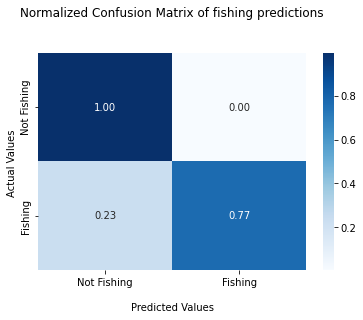

In [5]:
full_set = pd.read_csv('Data/full_set.csv', header=0)

full_x = full_set[['int_datetime', 'LogLatitude', 'LogLongitude', 'speed', 'speed_lead_1']]
full_y = full_set['fishing']

X_train, X_test, y_train, y_test = train_test_split(full_x, full_y, random_state=899370109, test_size=0.3)

clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
# normalize the confusion matrix
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues')

ax.set_title('Normalized Confusion Matrix of fishing predictions\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Fishing','Fishing'])
ax.yaxis.set_ticklabels(['Not Fishing','Fishing'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [6]:
full_test = X_test
full_test['y_test'] = y_test.tolist()
full_test['y_pred'] = y_pred
y_proba = pd.DataFrame(y_proba)
full_test['y_proba 0'] = y_proba[0].tolist()
full_test['y_proba 1'] = y_proba[1].tolist()